# Datasets

Just to be clear, the following examples are for demonstration and testing purposes only. Users are not expected to make their own dummy datasets. Refer to the pages **High-Level API** and/ or **Low-Level API** if you actually want to use the library.

## Prerequisites
If you've already completed the instructions on the **Installation** page, then let's get started.

In [1]:
import os 
os.chdir('/Users/Layne/Desktop/aiqc')

In [2]:
import aiqc
from aiqc import examples

/Users/layne/.pyenv/versions/3.7.6/envs/jupyterlab/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Dummy Data

There are a few KB of tabular `demo_files` included with the package that are well suited for classification (multi & binary) and regression models. We'll use this dummy data in the examples below and throughout the documentation.

The `list_demo_files()` method provides metadata about each of file that is included in the package so that you can decide how to use them.

> By default it returns a Pandas DataFrame, but you can `list_demo_files(format='list')` to change that.

In [3]:
examples.list_demo_files()

,name,analysis_type,label,label_classes,features,samples,description
0,iris.tsv,classification multi-label,species,3,4,150,"3 species of flowers. Only 150 rows, so cross-folds not represent population."
1,sonar.csv,classification binary label,object,2,60,208,"Detecting either a rock ""R"" or mine ""M"". Each feature is a sensor reading."
2,houses.csv,regression,price,1,12,506,Predict the price of the house.
3,iris_noHeaders.csv,classification multi-label,species,3,4,150,For testing; no column names.
4,iris_10x.tsv,classification multi-label,species,3,4,1500,For testing; duplicated 10x so cross-folds represent population.


The `demo_file_to_pandas()` method makes it easy to fetch the dummy data as a Pandas DataFrame.

In [4]:
df = examples.demo_file_to_pandas('houses.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Alternatively, if you prefer to work directly with the file itself, then you can obtain the location of the file via the `get_demo_file_path()` method.

In [5]:
examples.get_demo_file_path('houses.csv')

'/Users/layne/Desktop/aiqc/aiqc/data/houses.csv'

In [3]:
df = examples.demo_file_to_pandas('houses.csv')

In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [5]:
dataset = aiqc.Dataset.Tabular.from_pandas(df)

In [6]:
label = dataset.make_label(columns=['price'])

In [7]:
featureset = dataset.make_featureset(exclude_columns=['price'])

In [9]:
splitset = featureset.make_splitset(label_id=label.id, size_test=0.20)

In [14]:
foldset = splitset.make_foldset(
    fold_count = 3
    , continuous_bin_count = 4
)


Warning - The number of samples in your training Split <404>
is not evenly divisible by the `fold_count` you specified <3>.
This can cause misleading performance metrics for the last Fold.



/Users/layne/.pyenv/versions/3.7.6/envs/jupyterlab/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


<AxesSubplot:ylabel='Frequency'>

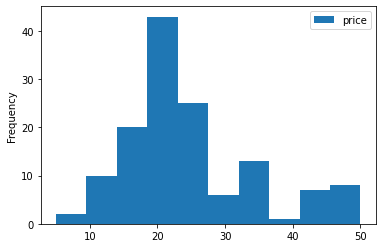

In [23]:
foldset.to_pandas()[0]['fold_validation']['labels'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

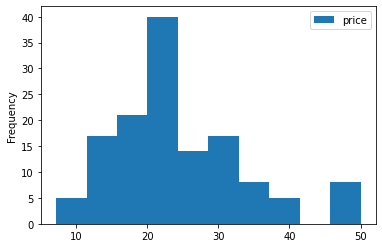

In [24]:
foldset.to_pandas()[1]['fold_validation']['labels'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

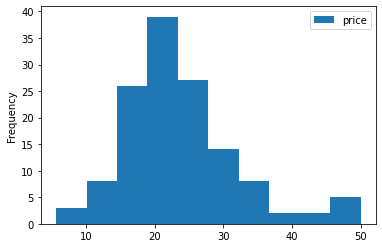

In [25]:
foldset.to_pandas()[2]['fold_validation']['labels'].plot.hist()